2109번 - 순회강연

In [2]:
import heapq

n = int(input())
v = []

for _ in range(n):
    a, b = map(int, input().split())
    v.append((b, a))

v.sort()

pq = []
for deadline, cup in v:
    heapq.heappush(pq, cup)
    if len(pq) > deadline:
        heapq.heappop(pq)

ret = sum(pq)
print(ret)

185


9935번 - 문자열 폭발

In [4]:
import sys

input = sys.stdin.readline

S = input().strip()
T = input().strip()
stack = []
t_len = len(T)

for char in S:
    stack.append(char)
    if len(stack) >= t_len and ''.join(stack[-t_len:]) == T:
        del stack[-t_len:]

result = ''.join(stack)
print(result if result else "FRULA")

171471번 - 게리맨더링
* N개의 구역
* 두 개의 구역으로 나눈다.
* 각 구역은 모두 연결되어 있어야 한다.
* 각 구역은 1개 이상

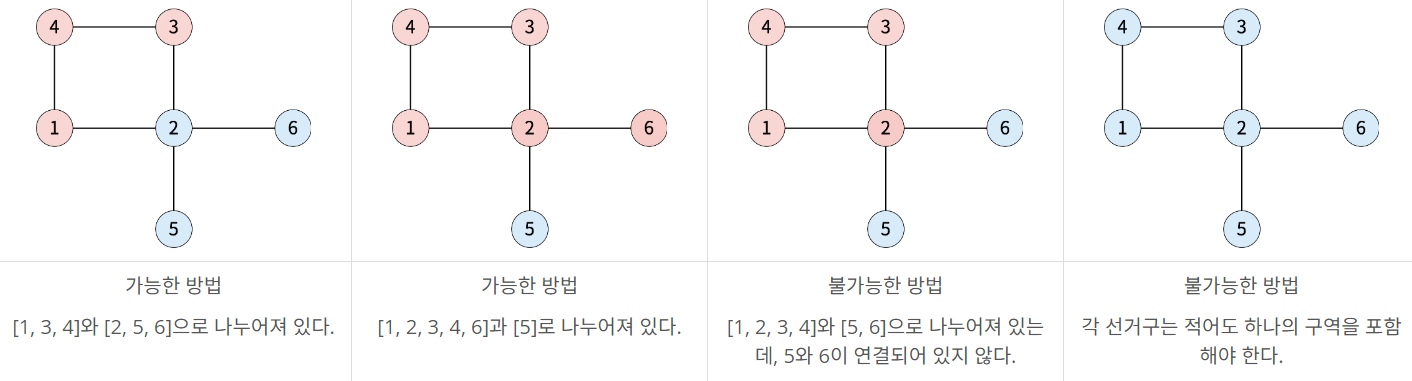

In [ ]:
import sys
from collections import defaultdict

INF = 987654321
n = 0
a = [0]*11
m = 0
temp = 0
ret = INF
comp = [0] * 11
visited = [0] * 11
adj = defaultdict(list) #각 키에 대해 기본값으로 빈 리스트를 갖는 딕셔너리를 생성

#DFS 함수
def dfs(here,value):
    #방문했음 표시
    visited[here] = 1 
    
    # 1, 현재 그룹에 속한 노드 수를 나타낸다. 0, 현재 그룹에 속한 노드들의 값의 합을 계산한다.
    ret = [1, a[here]]
    for there in adj[here]: #현재 노드와 연결된 모든 노드에 대해 반복
        if comp[there] != value: #연결 노드가 탐색 그룹에 안속하면 건너뛴다.
            continue
        if visited[there]: #방문했으면 넘겨
            continue
        _temp = dfs[there,value] #조건 연결된 노드에 대해 재귀적으로 DFS 수행
        ret[0] += _temp[0] #현재 그룹에 속한 노드 수 증가
        ret[1] += _temp[1] #현재 그룹 속한 노드 값 합 증가

        #**_temp의 이유, 임시변수는 종종 '_'로 표시하는 관례가 있다.
        #temp는 이미 전역 변수로 사용되어서 이와 구분하기 위해 임시변수 _temp를 사용한다.

    return ret

input = sys.stdin.readline

n = int(input())
a = [0] + list(map(int, input().split()))

for i in range(1, n + 1):
    m, *neighbors = map(int, input().split())
    for neighbor in neighbors:
        adj[i].append(neighbor)
        adj[neighbor].append(i)


for i in range(1, (1 << n) - 1):
    comp = [0] * 11
    visited = [0] * 11
    idx1, idx2 = -1, -1
    for j in range(n):
        if i & (1 << j):
            comp[j + 1] = 1
            idx1 = j + 1
        else:
            idx2 = j + 1
    
    comp1 = dfs(idx1, 1)
    comp2 = dfs(idx2, 0)
    
    if comp1[0] + comp2[0] == n:
        ret = min(ret, abs(comp1[1] - comp2[1]))

1987번 - 알파벳

In [ ]:
import sys

input = sys.stdin.readline

R, C = map(int, input().split())
a = [input().strip() for _ in range(R)]
ret = 0

dy = [-1, 0, 1, 0]
dx = [0, 1, 0, -1]

def go(y, x, num, cnt):
    global ret
    ret = max(ret, cnt)
    for i in range(4):
        ny, nx = y + dy[i], x + dx[i]
        if 0 <= ny < R and 0 <= nx < C:
            next_bit = 1 << (ord(a[ny][nx]) - ord('A'))
            if num & next_bit == 0:
                go(ny, nx, num | next_bit, cnt + 1)

go(0, 0, 1 << (ord(a[0][0]) - ord('A')), 1)
print(ret)